Data Science Project
```



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install -U -q PyDrive 
  
from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials 
  
  
# Authenticate and create the PyDrive client. 
auth.authenticate_user() 
gauth = GoogleAuth() 
gauth.credentials = GoogleCredentials.get_application_default() 
drive = GoogleDrive(gauth)

In [3]:
#Reading the dataset
link = 'https://drive.google.com/file/d/1O5sR8bl0jUNt1VrZU_A_Y2rlLBBfaC6o/view?usp=sharing'
id = link.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('data.csv')   
  
df = pd.read_csv('data.csv') 
print(df)

                  Id         groupId  ... winPoints  winPlacePerc
0     2f262dd9795e60  78437bcd91d40e  ...      1470        0.0000
1     a32847cf5bf34b  85b7ce5a12e10b  ...      1531        0.2222
2     1b1900a9990396  edf80d6523380a  ...         0        0.8571
3     f589dd03b60bf2  804ab5e5585558  ...         0        0.3462
4     c23c4cc5b78b35  b3e2cd169ed920  ...      1557        0.0690
...              ...             ...  ...       ...           ...
9995  ef4f474acd8e85  2eca2a8391f75d  ...      1471        0.8333
9996  cf0bf82fb4d80e  2eaf2765f93adb  ...      1500        0.7174
9997  a0a31a0b1dcbe1  8d50c64ccc5071  ...      1434        0.2083
9998  f6874657399d69  d31843d7e62ccb  ...      1534        0.2449
9999  90359b0b8f8b0d  61d5b1bb8da43f  ...         0        0.1875

[10000 rows x 29 columns]


In [ ]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2f262dd9795e60,78437bcd91d40e,d5db3a49eb2955,0,0,0.0,0,0,0,92,1126,0,0,0.000,1376,squad-fpp,29,28,-1,0,0.0,0,0.0,0,0,0.0,0,1470,0.0000
1,a32847cf5bf34b,85b7ce5a12e10b,65223f05c7fdb4,0,0,163.2,1,1,0,42,1309,1,1,6.589,1370,squad-fpp,28,28,-1,0,0.0,0,0.0,0,0,132.7,2,1531,0.2222
2,1b1900a9990396,edf80d6523380a,1cadec4534f30a,0,3,278.7,2,1,8,16,0,2,1,23.070,1381,squad-fpp,29,27,1479,3,0.0,0,0.0,0,0,3591.0,10,0,0.8571
3,f589dd03b60bf2,804ab5e5585558,c4a5676dc91604,0,0,191.9,1,0,0,31,0,1,1,24.890,1708,squad,27,25,1500,0,0.0,0,0.0,0,0,332.7,3,0,0.3462
4,c23c4cc5b78b35,b3e2cd169ed920,cd595700a01bfa,0,0,100.0,1,0,0,87,1332,0,0,0.000,1807,squad-fpp,30,30,-1,0,0.0,0,0.0,0,0,252.7,3,1557,0.0690


In [ ]:
#datatypes of columns
print(df.dtypes)

Id                  object
groupId             object
matchId             object
assists              int64
boosts               int64
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float64
matchDuration        int64
matchType           object
maxPlace             int64
numGroups            int64
rankPoints           int64
revives              int64
rideDistance       float64
roadKills            int64
swimDistance       float64
teamKills            int64
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
winPlacePerc       float64
dtype: object


In [ ]:
#Summary of numerical columns
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.0000,10000.000000
mean,0.234600,1.088500,129.211264,0.64400,0.221700,1.354000,47.663100,506.970200,0.913400,0.543800,23.272333,1575.398000,44.655500,43.151300,889.699600,0.160200,600.693584,0.004200,4.385917,0.024400,0.007700,1130.008410,3.63590,609.3440,0.469926
std,0.575149,1.703279,167.193945,1.09562,0.577046,2.629102,27.424146,627.297959,1.524117,0.701948,50.536262,258.963515,23.800859,23.272567,738.535034,0.454045,1524.915601,0.074719,30.889620,0.171486,0.089674,1168.597983,2.42209,739.7924,0.304508
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,464.000000,2.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,1366.000000,28.000000,27.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,151.575000,2.00000,0.0000,0.200000
50%,0.000000,0.000000,83.805000,0.00000,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,1431.500000,30.000000,30.000000,1444.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,650.350000,3.00000,0.0000,0.458300
75%,0.000000,2.000000,185.325000,1.00000,0.000000,2.000000,71.000000,1169.000000,1.000000,1.000000,22.345000,1849.250000,49.000000,47.000000,1500.000000,0.000000,0.000575,0.000000,0.000000,0.000000,0.000000,1923.250000,5.00000,1495.0000,0.735100
max,7.000000,18.000000,3469.000000,11.00000,14.000000,31.000000,100.000000,1926.000000,35.000000,4.000000,538.600000,2202.000000,100.000000,100.000000,2835.000000,5.000000,28780.000000,3.000000,971.200000,3.000000,2.000000,10490.000000,41.00000,1863.0000,1.000000


In [ ]:
#Most kills recorded
df['kills'].max()

35

In [ ]:
#Printing all the columns in dataframe
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [ ]:
#Comment on matchDuration
df['matchDuration'].describe()

count    10000.000000
mean      1575.398000
std        258.963515
min        464.000000
25%       1366.000000
50%       1431.500000
75%       1849.250000
max       2202.000000
Name: matchDuration, dtype: float64

In [ ]:
#Comment on walkDistance
df['walkDistance'].describe()

count    10000.000000
mean      1130.008410
std       1168.597983
min          0.000000
25%        151.575000
50%        650.350000
75%       1923.250000
max      10490.000000
Name: walkDistance, dtype: float64

In [ ]:
#Unique values in matcType and their count
un=df["matchType"].unique()
print(un)
print() 
np.unique(un,return_counts=True)

['squad-fpp' 'squad' 'duo-fpp' 'solo-fpp' 'duo' 'solo' 'crashfpp'
 'flaretpp' 'normal-squad-fpp' 'normal-duo-fpp' 'flarefpp' 'normal-squad'
 'normal-solo-fpp' 'crashtpp']



(array(['crashfpp', 'crashtpp', 'duo', 'duo-fpp', 'flarefpp', 'flaretpp',
        'normal-duo-fpp', 'normal-solo-fpp', 'normal-squad',
        'normal-squad-fpp', 'solo', 'solo-fpp', 'squad', 'squad-fpp'],
       dtype=object), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [ ]:
#Displaying all categorical columns
cat_data=df.select_dtypes(exclude=[np.number])
print(cat_data)

                  Id         groupId         matchId  matchType
0     2f262dd9795e60  78437bcd91d40e  d5db3a49eb2955  squad-fpp
1     a32847cf5bf34b  85b7ce5a12e10b  65223f05c7fdb4  squad-fpp
2     1b1900a9990396  edf80d6523380a  1cadec4534f30a  squad-fpp
3     f589dd03b60bf2  804ab5e5585558  c4a5676dc91604      squad
4     c23c4cc5b78b35  b3e2cd169ed920  cd595700a01bfa  squad-fpp
...              ...             ...             ...        ...
9995  ef4f474acd8e85  2eca2a8391f75d  492ecdfae90b46  squad-fpp
9996  cf0bf82fb4d80e  2eaf2765f93adb  14bffd71e96320    duo-fpp
9997  a0a31a0b1dcbe1  8d50c64ccc5071  147e4bbb62e3bb    duo-fpp
9998  f6874657399d69  d31843d7e62ccb  662567dcf280f5    duo-fpp
9999  90359b0b8f8b0d  61d5b1bb8da43f  258bfa48d88014       solo

[10000 rows x 4 columns]


In [ ]:
#Adding a new column KILLS
df['KILL']=df['headshotKills']+df['roadKills']+df['teamKills']
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,KILL
0,2f262dd9795e60,78437bcd91d40e,d5db3a49eb2955,0,0,0.0,0,0,0,92,1126,0,0,0.000,1376,squad-fpp,29,28,-1,0,0.0,0,0.0,0,0,0.00,0,1470,0.0000,0
1,a32847cf5bf34b,85b7ce5a12e10b,65223f05c7fdb4,0,0,163.2,1,1,0,42,1309,1,1,6.589,1370,squad-fpp,28,28,-1,0,0.0,0,0.0,0,0,132.70,2,1531,0.2222,1
2,1b1900a9990396,edf80d6523380a,1cadec4534f30a,0,3,278.7,2,1,8,16,0,2,1,23.070,1381,squad-fpp,29,27,1479,3,0.0,0,0.0,0,0,3591.00,10,0,0.8571,1
3,f589dd03b60bf2,804ab5e5585558,c4a5676dc91604,0,0,191.9,1,0,0,31,0,1,1,24.890,1708,squad,27,25,1500,0,0.0,0,0.0,0,0,332.70,3,0,0.3462,0
4,c23c4cc5b78b35,b3e2cd169ed920,cd595700a01bfa,0,0,100.0,1,0,0,87,1332,0,0,0.000,1807,squad-fpp,30,30,-1,0,0.0,0,0.0,0,0,252.70,3,1557,0.0690,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ef4f474acd8e85,2eca2a8391f75d,492ecdfae90b46,0,3,204.5,1,0,0,17,1033,2,1,13.270,1288,squad-fpp,31,30,-1,3,0.0,0,0.0,0,0,1648.00,4,1471,0.8333,0
9996,cf0bf82fb4d80e,2eaf2765f93adb,14bffd71e96320,0,0,0.0,0,0,0,49,1000,0,0,0.000,1906,duo-fpp,47,44,-1,0,0.0,0,0.0,0,0,897.10,6,1500,0.7174,0
9997,a0a31a0b1dcbe1,8d50c64ccc5071,147e4bbb62e3bb,0,0,0.0,0,0,0,83,1334,0,0,0.000,1344,duo-fpp,49,49,-1,0,0.0,0,0.0,0,0,188.20,2,1434,0.2083,0
9998,f6874657399d69,d31843d7e62ccb,662567dcf280f5,0,0,0.0,0,0,0,82,1335,0,0,0.000,1355,duo-fpp,50,50,-1,0,0.0,0,0.0,0,0,108.10,5,1534,0.2449,0


In [ ]:
#Rounding winPlacePerc to 2 decimal places
df['winPlacePerc'].round(2)

0       0.00
1       0.22
2       0.86
3       0.35
4       0.07
        ... 
9995    0.83
9996    0.72
9997    0.21
9998    0.24
9999    0.19
Name: winPlacePerc, Length: 10000, dtype: float64

In [ ]:
#Average kills by a person
df['kills'].mean()

0.9134

In [ ]:
#99% of people kills
df['kills'].mean()/0.99

0.9226262626262626

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

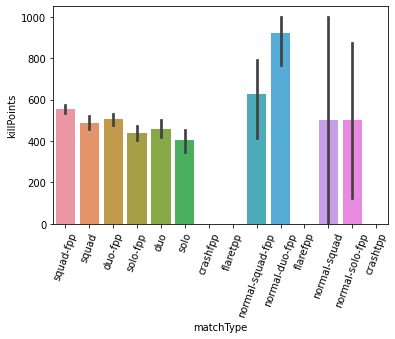

In [ ]:
#Barplot for matchType and KillPoints
sns.barplot(x='matchType' , y='killPoints' , data=df)
plt.xticks(rotation=70)
#From the graph we can see that normal duo-fpp has max kill points and crashfpp, crashtpp and flaretpp has minimum of 0 kill points

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

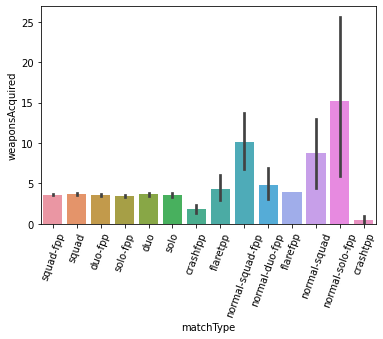

In [ ]:
#Barplot for matchType and weaponsAcquired
sns.barplot(x='matchType' , y='weaponsAcquired' , data=df)
plt.xticks(rotation=70) 
#From the graph we can see that normal solo-fpp has acquired maximum weapons and crash-tpp has minimum weapons acquired

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

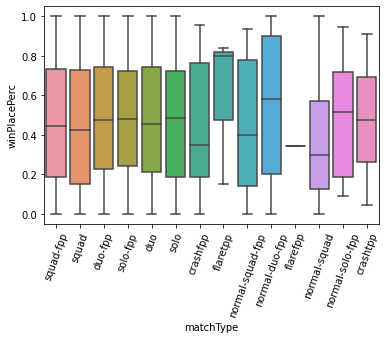

In [ ]:
#Boxplot of matchType and winPlacePerc
sns.boxplot(x='matchType' , y='winPlacePerc' , data=df)
plt.xticks(rotation=70)
#From the graph we can see that normal-duo-fpp has maximum win% and flare-up has minimum win%

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

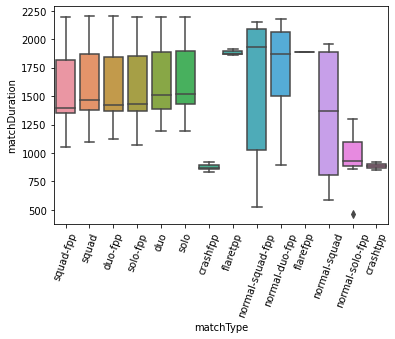

In [ ]:
#Boxplot of matchType and matchDuration
sns.boxplot(x='matchType' , y='matchDuration' , data=df)
plt.xticks(rotation=70)
#From the graph we can see that normal-squad-fpp has maximum match duration while flare-up has minimum match duration

(array([ 250.,  500.,  750., 1000., 1250., 1500., 1750., 2000., 2250.,
        2500.]), <a list of 10 Text major ticklabel objects>)

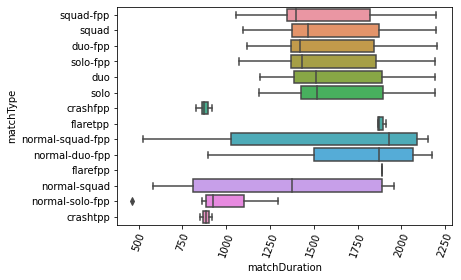

In [ ]:
#Conversion of above boxplot to horizontal
sns.boxplot(y='matchType' , x='matchDuration' , data=df)
plt.xticks(rotation=70)

99.0



(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-0.5 , -0.48, -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34,
        -0.32, -0.3 , -0.28, -0.26, -0.24, -0.22, -0.2 , -0.18, -0.16,
        -0.14, -0.12, -0.1 , -0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,
         0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,  0.18,  0.2 ,
         0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,  0.36,  0.38,
         0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ]),
 <a list of 50 Patch objects>)

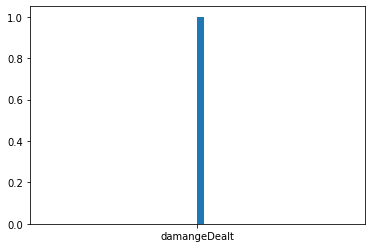

In [ ]:
ht=df['damageDealt'].sample(50)
print(ht.mean())
print() 
plt.hist('damangeDealt',bins=50)

In [ ]:
#Pairplot of dataframe
sns.pairplot(df)